In [ ]:


# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys  # pt a scrie ieșirea programului pe fluxul standard de ieșire folosind sys.stdout

# utilizată pentru a crea în mod automat fișiere temporare cu nume unice, pt a fi folosite ulterior
from tempfile import NamedTemporaryFile

# preia o adresă URL ca argument și returnează un obiect asemănător unui fișier care reprezintă datele recuperate,
# permițând citirea conținutul adresei URL folosind metode precum read(), readline(), și readlines()
from urllib.request import urlopen

# "unquote" decodifică șirurile URL codificate cu procente înapoi la forma lor originală
# "urlparse" analizează un șir URL în părțile sale componente, facilitând lucrul cu diferite secțiuni ale URL-ului
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError  # pt a identifica și gestiona cazurile în care solicitările HTTP întâmpină erori pe partea serverului
from zipfile import ZipFile # pt a arhiva fisiere
import tarfile # instrument pentru a lucra cu fișiere arhivate TAR (Tape Archive)

# Oferă o colecție de funcții de nivel înalt pentru lucrul cu fișiere și directoare.
# Permite efectuarea unor sarcini comune, precum: copierea, mutarea, stergerea fisierelor, arhivare si dezarhivare
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'ravdess-emotional-speech-audio:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F107620%2F256618%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240330%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240330T122253Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2bbe5857e5ef2bfc9ce51265b0cd504baf9f1b822ba5032d3cc4da257a23936da953777931c7083cb449889e8eefdc57c4f56cfa7bba63fb85bd1953a7e845fb76c30144ca4e97c3b2882fb1ce1c3b6e88b6277762f60776436f2d9f129c7a321fd00ff48b9fcfd2e6861306825bfa884d43ffd0ec565b4bec91b2a35c68ff5fbfc7ace5118c438151ff0c2c09059d13f0c54b3b87e242d67e369501a423828dda6643c172a6ffb32db083bdaa13af9fe9525755d804cfb892359fbed111dfad5422dc13b92abff2acb03e83da2af91fe715021ad9ec1c9ff3e4e1fea30e4c6cb14d8b75c3c1208f9e79670c527343495895e92a623e470e0fcfe840fc99996a,ravdess-emotional-song-audio:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F107666%2F256774%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240330%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240330T122253Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D1022d685f2eb9dbeebaf79223f6dce12f7032ddfe43509fe4d5e06b4f7954d0fd4d38ba602e683f96affbdb0ff428cd3ff7d380d417c73e5f9da1bc4a10a02c10aae968667f3a5980d80e4bd9bb20ae01b930ee2d33d5e7cf2147938a2017c87bbfd5ac66b22bfc154a3b3447915487208079ac87ef1e0e199cf75f21140e69e1ecea1a5c86880ab183c9dc212aafd95aa2eab20f7f6a48eb8c2f0511240f915438b748027ad1cd1a18bc961ceffb9b313cc79cac87964db491c9f7bb1f6f61735254923a1e4061f3ed3522c7166d26a27de5dd176c6827f8320887c7b084ca1eccadcee00aaa73dee7a05f42d879ca8dce785d201799b7daee260070279d3ca,toronto-emotional-speech-set-tess:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F316368%2F639622%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240330%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240330T122253Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4b8f470eca7247e379f677c45bb55a9639909ff733acbeeea19c258b5f85607c2c23a2a845b4db0ff85467cc0ffcba59b2aeae06d47b548c739fe106eb9637ceb04e59993bdad81bc8456585dbb95b91f06f081220c0206623a79f16a3741b8eb02acbbfcb0fce6386e7d6f13e029b562ad10c9941f1c05d716adbb9a05dab1aaa3b46d003533c42561a73370d501301682642bb237719b53fa4705da29035d8c3f1aa26b242adf3e43fd65957a09bf0a59b2bd974e52a0d1bbd51de513795a56e5f81f5d7f62c2ba157c77966e249697bf1b09507ddb3824face4ad806330975097fd98ec663578d024acf82257daf5336ac535eb9221d07e94bf20495351ae,cremad:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F325566%2F653195%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240330%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240330T122253Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D53afd1c97f4993b662504ad019e36646dbfec08b4b1f0fd394cdec27207b483f29bd705a00a4b96fbd492351aa1fd353c7ba8a0233ce36510eb29cb6d40cafccd29cf83d9675a709b0276c523e22279c08586eb03a58a757255a84bb0200db13cfc09af6ec19383ae25beda94b9407c26ab69f16f930bbba239b01827b402cd1b3719a85f7d61ee4524a03897e3c37236f547a4f514f58e6e3e190cce3c779bc413dce259a260ff002400576b405873be32c878b56910e0dbd7d56931afb63e57ed075715a0a4af16176a7977b0a861822137a11089b051af4efd12aa2c4dd7f717c070c7ab832202eec34cd07edfeb79943682b1e451f5c0c7f24da5c2cb261,surrey-audiovisual-expressed-emotion-savee:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F338555%2F671851%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240330%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240330T122253Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D07ace6678b268f16a64367257eec715cddadf9c7ac7f255b5bbb4629604ef97b2018fc060f1296c97028d51b05322f59e7b29f0d0248d5e05c772a4544527b0d45c2438bc6d32cd78e34938db7be868abe49a2862107c8eba3842c1d28b38f05e3bf659e8019c915ebaaabd281a982c52dc71ac3f0cb3c43ff74a7a5bdc3db4b7b2c7f0ea294cfbec331a673f7dfe7078a67bde430a4fb3cdd5febc8beb5dab853618c6c5cb3a9af2221b9b7cba3a372d2ba37a73e78d32558693a53cd47d63d8cef25ace1ad0de3916664cc8a6908a30f7347aab1e00af9894d9b0740fc7a432ab178c79838b5084cc03b77fc5cea5d448adbc3ba1c9a3ce16e41de55075106,features:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1156269%2F1938284%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240330%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240330T122253Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D07668934f5f1c929276b148cc947cb25046c444d2589a9e210dd1739877159ea4e2fdb0b6bb1f92573b81636f9d90677aa2f6a640d1d4e2e03dce58a82ae56616efc8c6d571b089116503d87ddc4bff0d6149195f4fa2ef2a9a312c177c5ba7bb9d9c91cd1cac6bca15bdc0b90c055d18147039008376f91f0941a3cdf68144bf4e0b266ae0d8db231620f04a7653c021482292b4c9005776b7bdf838e12b634d70c36def71f0cdbb12695e12aa970990fedefd42e73b509d7727ff3c170e4556c4a2583cde73404a38e3acc79e3db366df95a784f0763116ef29fdd40c02dbeb44d367d334a98954a8ee65976279ef6c291e05e373105e3f3bd0346392f2924'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 450102890 bytes downloaded
Downloaded and uncompressed: ravdess-emotional-speech-audio
[==================================================] 477641670 bytes downloaded
Downloaded and uncompressed: ravdess-emotional-song-audio
[==================================================] 448572034 bytes downloaded
Downloaded and uncompressed: toronto-emotional-speech-set-tess
[==================================================] 473324524 bytes downloaded
Downloaded and uncompressed: cremad
[==================================================] 112690765 bytes downloaded
Downloaded and uncompressed: surrey-audiovisual-expressed-emotion-savee
[==================================================] 38593913 bytes downloaded
Downloaded and uncompressed: features
Data source import complete.


# <center>Recunoașterea emoțiilor din vorbire

In [ ]:
import os # oferă funcții pentru interacțiunea cu sistemul de operare:
#Crearea, ștergerea, redenumirea și mutarea fișierelor și directoarelor.
# Verificarea existenței unei căi, tipul acesteia (fișier sau director) și permisiunile de acces.
# Obținerea dimensiunii fișierului și a orei de modificare.
# Listarea conținutului unui director.
# Schimbarea directorului curent de lucru.

import numpy as np # pt operatii algebrice
import pandas as pd # Prelucrarea datelor; fișiere de intrare/ieșire CSV (de exemplu: pd.read_csv)
import matplotlib.pyplot as plt # pentru afisare imagini
import seaborn as sns # pentru vizualizarea statistică a datelor; oferă o interfață de nivel ridicat fata de matplotlib, simplificând crearea de diagrame atractive și informative.

# Librosa este o bibliotecă Python pentru a analiza audio și muzică. Poate fi folosită pentru a extrage date din fișiere audio
import librosa
import librosa.display

# Pentru a reda fișierele audio
from IPython.display import Audio
plt.style.use('seaborn-white')

<ipython-input-2-0b6be6363752>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


** Având în vedere că extragerea caracteristicilor necesită o cantitate mare de timp, înainte de a începe, în codul de mai jos, se specifică dacă există deja cadre de date disponibile și, dacă da, calea către acestea.

In [ ]:
DATA_FRAMES = True
fem_path = '../input/features/Female_features.csv'
mal_path = '../input/features/Male_features.csv'

# <center>Baza de date pentru recunoașterea emoțiilor din vorbire<center>  

**Conținut**
Baza de date conține fișiere audio din RAVDESS, CREMA-D, SAVEE, TESS.
   
Din toate fișierele setul de date conține:
* CREMA-D - 7,442
* TESS - 2,800
* RAVDESS - 2,076
* SAVEE - 480

In [ ]:
TESS = "../input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
RAV = "../input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
SAVEE = "../input/surrey-audiovisual-expressed-emotion-savee/ALL/"
CREMA = "../input/cremad/AudioWAV/"

In [ ]:
# Se obține locația datelor pentru SAVEE și se creează o listă cu acestea
dir_list = os.listdir(SAVEE)

# se analizează numele fișierului pentru a obține emoțiile
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('angry')
    elif i[-8:-6]=='_d':
        emotion.append('disgust')
    elif i[-8:-6]=='_f':
        emotion.append('fear')
    elif i[-8:-6]=='_h':
        emotion.append('happy')
    elif i[-8:-6]=='_n':
        emotion.append('neutral')
    elif i[-8:-6]=='sa':
        emotion.append('sad')
    elif i[-8:-6]=='su':
        emotion.append('surprise')
    else:
        emotion.append('unknown')
    path.append(SAVEE + i)

# Acum se verifică distribuția numărului (indexului) de etichete
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
print('SAVEE dataset')
SAVEE_df.head()

SAVEE dataset


labels                                               path
0    angry  ../input/surrey-audiovisual-expressed-emotion-...
1  disgust  ../input/surrey-audiovisual-expressed-emotion-...
2  neutral  ../input/surrey-audiovisual-expressed-emotion-...
3  disgust  ../input/surrey-audiovisual-expressed-emotion-...
4  neutral  ../input/surrey-audiovisual-expressed-emotion-...

In [ ]:
# Se obține locația datelor pentru TESS și se creează o listă cu acestea
path = []
emotion = []
dir_list = os.listdir(TESS)

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('neutral')
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('surprise')
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
#TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
print('TESS dataset')
TESS_df.head()

TESS dataset


labels                                               path
0  surprise  ../input/toronto-emotional-speech-set-tess/tes...
1  surprise  ../input/toronto-emotional-speech-set-tess/tes...
2  surprise  ../input/toronto-emotional-speech-set-tess/tes...
3  surprise  ../input/toronto-emotional-speech-set-tess/tes...
4  surprise  ../input/toronto-emotional-speech-set-tess/tes...

In [ ]:
# Se importă datele pentru RAVDESS
dir = os.listdir(RAV) #se creează o listă

males = []
females = []

for actor in dir:

    files = os.listdir(RAV + actor)

    for file in files:
        part = file.split('.')[0]
        part = part.split("-")

        temp = int(part[6])

        if part[2] == '01':
            emotion = 'neutral'
        elif part[2] == '02':
            emotion = 'calm'
        elif part[2] == '03':
            emotion = 'happy'
        elif part[2] == '04':
            emotion = 'sad'
        elif part[2] == '05':
            emotion = 'angry'
        elif part[2] == '06':
            emotion = 'fear'
        elif part[2] == '07':
            emotion = 'disgust'
        elif part[2] == '08':
            emotion = 'surprise'
        else:
            emotion = 'unknown'

        if temp%2 == 0:
            path = (RAV + actor + '/' + file)
            #emoție = 'femeie_'+emoție
            females.append([emotion, path])
        else:
            path = (RAV + actor + '/' + file)
             #emoție = 'bărbat_'+emoție
            males.append([emotion, path])


RavFemales_df = pd.DataFrame(females)
RavFemales_df.columns = ['labels', 'path']

RavMales_df = pd.DataFrame(males)
RavMales_df.columns = ['labels', 'path']

print('RAVDESS datasets')
RavFemales_df.head()

RAVDESS datasets


labels                                               path
0      sad  ../input/ravdess-emotional-speech-audio/audio_...
1    angry  ../input/ravdess-emotional-speech-audio/audio_...
2  disgust  ../input/ravdess-emotional-speech-audio/audio_...
3      sad  ../input/ravdess-emotional-speech-audio/audio_...
4      sad  ../input/ravdess-emotional-speech-audio/audio_...

In [ ]:
RavMales_df.head()

labels                                               path
0     calm  ../input/ravdess-emotional-speech-audio/audio_...
1     fear  ../input/ravdess-emotional-speech-audio/audio_...
2  neutral  ../input/ravdess-emotional-speech-audio/audio_...
3     calm  ../input/ravdess-emotional-speech-audio/audio_...
4  disgust  ../input/ravdess-emotional-speech-audio/audio_...

In [ ]:
files = os.listdir(CREMA) #creează listă cu datele pentru CREMA

female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]
males = []
females = []

for file in files:
    part = file.split('_')

    if part[2] == 'SAD':
        emotion = 'sad'
    elif part[2] == 'ANG':
        emotion = 'angry'
    elif part[2] == 'DIS':
        emotion = 'disgust'
    elif part[2] == 'FEA':
        emotion = 'fear'
    elif part[2] == 'HAP':
        emotion = 'happy'
    elif part[2] == 'NEU':
        emotion = 'neutral'
    else:
        emotion = 'unknown'

    if int(part[0]) in female:
        path = (CREMA + '/' + file)
        #emoție = 'femeie_'+emoție
        females.append([emotion, path])
    else:
        path = (CREMA + '/' + file)
        #emoție = 'bărbat_'+emoție
        males.append([emotion, path])

CremaFemales_df = pd.DataFrame(females)
CremaFemales_df.columns = ['labels', 'path']

CremaMales_df = pd.DataFrame(males)
CremaMales_df.columns = ['labels', 'path']

print('CREMA datasets')
CremaFemales_df.head()

CREMA datasets


labels                                           path
0      sad  ../input/cremad/AudioWAV//1073_TSI_SAD_XX.wav
1    happy  ../input/cremad/AudioWAV//1021_IWW_HAP_XX.wav
2  disgust  ../input/cremad/AudioWAV//1056_MTI_DIS_XX.wav
3    angry  ../input/cremad/AudioWAV//1063_IOM_ANG_XX.wav
4  neutral  ../input/cremad/AudioWAV//1084_ITH_NEU_XX.wav

In [ ]:
CremaMales_df.head()

labels                                           path
0  disgust  ../input/cremad/AudioWAV//1041_IEO_DIS_HI.wav
1  neutral  ../input/cremad/AudioWAV//1085_TAI_NEU_XX.wav
2      sad  ../input/cremad/AudioWAV//1083_IWL_SAD_XX.wav
3      sad  ../input/cremad/AudioWAV//1068_IOM_SAD_XX.wav
4    angry  ../input/cremad/AudioWAV//1090_IEO_ANG_MD.wav

In [ ]:
# Se îmbină (concatenează) toate cadrele de date
Males = pd.concat([SAVEE_df, RavMales_df, CremaMales_df], axis = 0)
Males.to_csv("males_emotions_df.csv", index = False)

Females = pd.concat([TESS_df, RavFemales_df, CremaFemales_df], axis = 0)
Females.to_csv("females_emotions_df.csv", index = False)

# <center> Vizualizarea Datelor

În primul rând, vom reprezenta grafic numărul emoțiilor (din care proporțiile sunt prezentate mai sus).

Apoi, folosind librăria Librosa, vom genera grafice de unde (waveplots) asociate cu fiecare emoție.

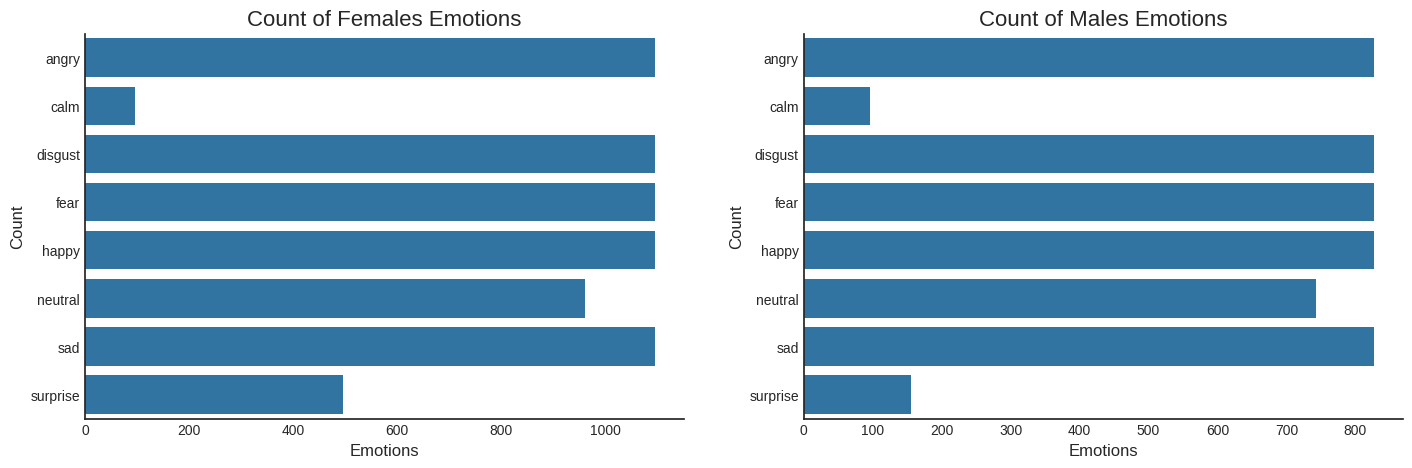

In [ ]:
order = ['angry','calm','disgust','fear','happy','neutral','sad','surprise']

fig = plt.figure(figsize=(17, 5))

fig.add_subplot(121)
plt.title('Numărul de emoții ale femeilor ', size=16)
sns.countplot(Females.labels, order = order)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

fig.add_subplot(122)
plt.title('Numărul de emoții ale bărbaților', size=16)
sns.countplot(Males.labels, order = order)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

plt.show()

In [ ]:
# definire funcție pentru a genera grafice de unde (waveplot)
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot pentru fișier audio cu emoția: {e} ', size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

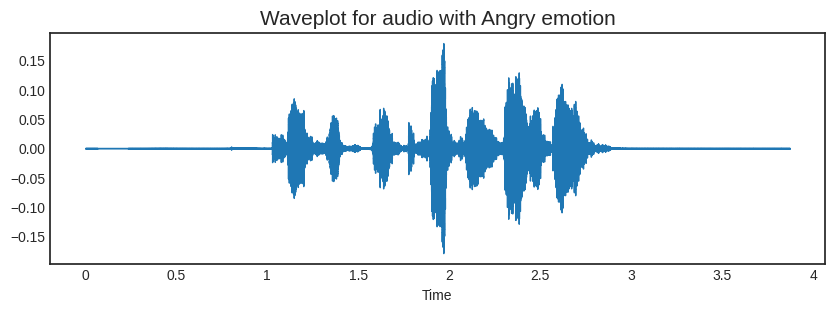

In [ ]:
emotion='Angry'
path = '../input/ravdess-emotional-speech-audio/Actor_01/03-01-05-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

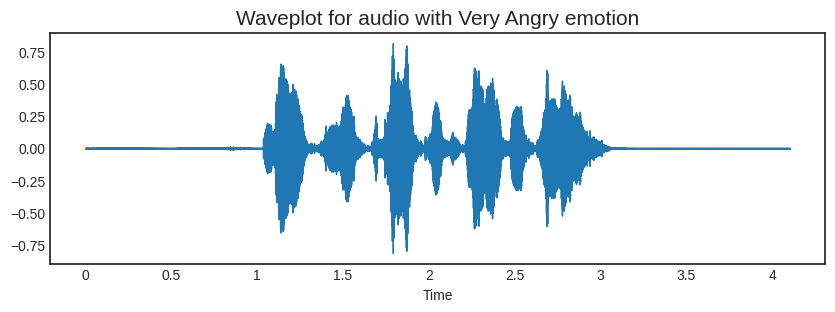

In [ ]:
emotion='Very Angry'
path = '../input/ravdess-emotional-speech-audio/Actor_01/03-01-05-02-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

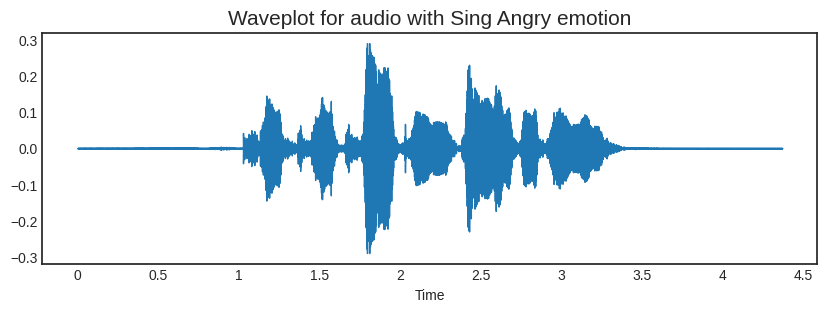

In [ ]:
emotion='Sing Angry'
path = '../input/ravdess-emotional-song-audio/Actor_01/03-02-05-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

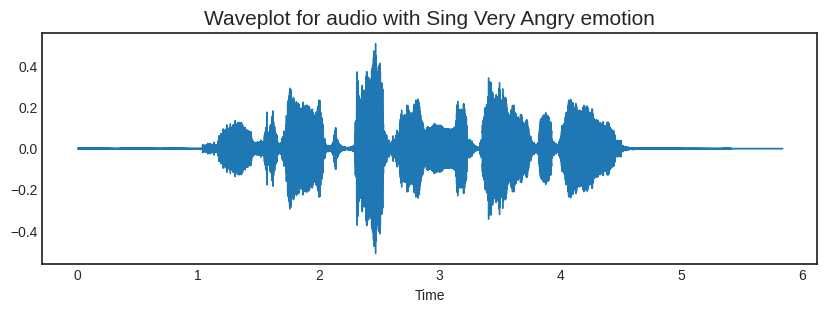

In [ ]:
emotion='Sing Very Angry'
path = '../input/ravdess-emotional-song-audio/Actor_01/03-02-05-02-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

## Adăugarea de augmentare

#### Definiție:
* Augmentarea datelor este procesul prin care creăm noi eșantioane sintetice de antrenament prin adăugarea unor perturbări minore la setul nostru inițial de antrenament.

* Obiectivul este de a face modelul nostru invariant la aceste perturbări și de a-i îmbunătăți capacitatea de generalizare.

* Pentru ca acest lucru să funcționeze, adăugarea perturbărilor trebuie să păstreze aceeași etichetă (label) ca eșantionul original de antrenament.

* În cazul imaginilor, augmentarea datelor poate fi realizată prin deplasarea imaginii (shifting), zoom, rotire.

* În cazul nostru, vom adăuga zgomot (noise), întindere și rulare (stretch and roll), schimbare de pitch (pitch shift): pitch-ul unui semnal audio reprezintă frecvența fundamentală; o valoare mai mare a pitch-ului corespunde unui sunet mai inalt, in timp ce o valoare mai mica corespunde unui sunet mai grav.

In [ ]:
#definire funcție pentru a adăuga zgomot
def noise(data):
    noise_amp = 0.04*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

#definire funcție pentru a adăuga întindere
def stretch(data, rate=0.70):
    return librosa.effects.time_stretch(data, rate=rate)

#definire funcție pentru a adăuga deplasare imaginii
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

#definire funcție pentru a schimba pitch-ul (frecventa fundamentală)
def pitch(data, sampling_rate, pitch_factor=0.8):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

#definire funcție pentru a mări viteza de redare a fișierului audio
def higher_speed(data, speed_factor = 1.25):
    return librosa.effects.time_stretch(data, rate=speed_factor)

#definire funcție pentru a micșora viteza de redare a fișierului audio
def lower_speed(data, speed_factor = 0.75):
    return librosa.effects.time_stretch(data, rate=speed_factor)

# se ia un exemplu și se verifică tehnicile.
path = path = '../input/ravdess-emotional-speech-audio/Actor_01/03-01-05-01-01-01-01.wav'
data, sample_rate = librosa.load(path)

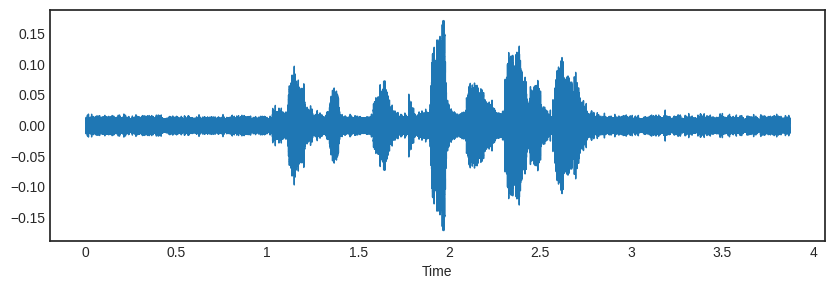

In [ ]:
#afișare waveplot pentru fișierul audio cu zgomot
plt.figure(figsize=(10,3))
x = noise(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

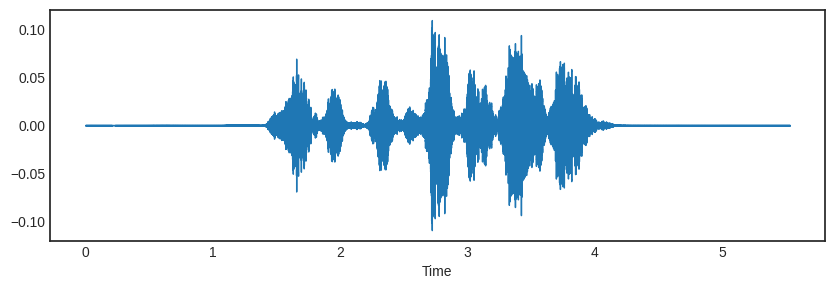

In [ ]:
#afișare waveplot pentru fișierul audio cu întindere
plt.figure(figsize=(10,3))
x = stretch(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

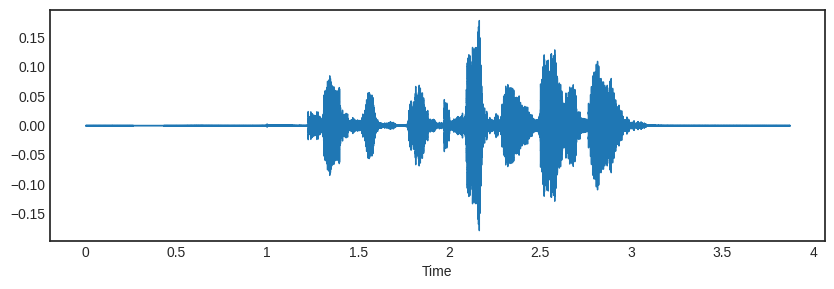

In [ ]:
#afișare waveplot pentru fișierul audio deplasat
plt.figure(figsize=(10,3))
x = shift(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

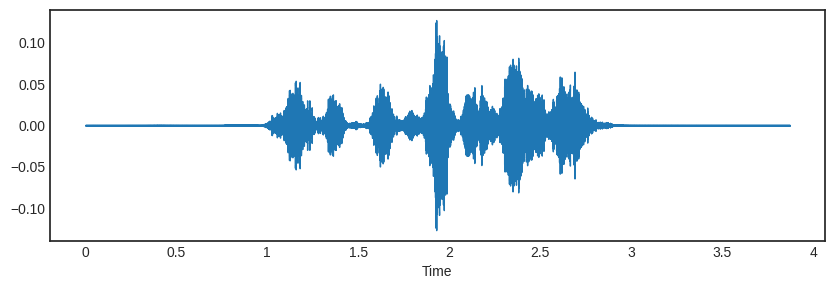

In [ ]:
#afișare waveplot pentru fișierul audio cu pitch-ul (frecvența fundamentală) schimbat
plt.figure(figsize=(10,3))
x = pitch(data, sample_rate)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

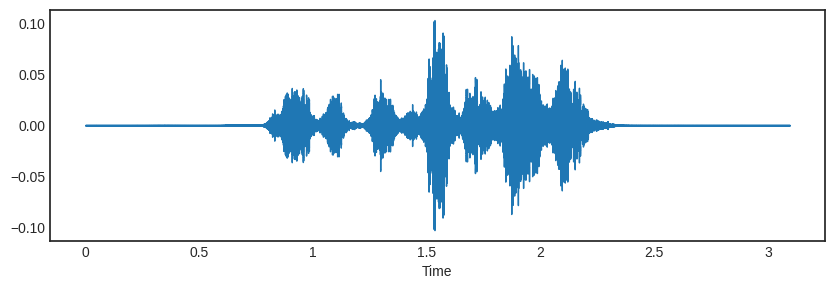

In [ ]:
#afișare waveplot pentru fișierul audio cu viteza de redare mărită
plt.figure(figsize=(10,3))
x = higher_speed(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

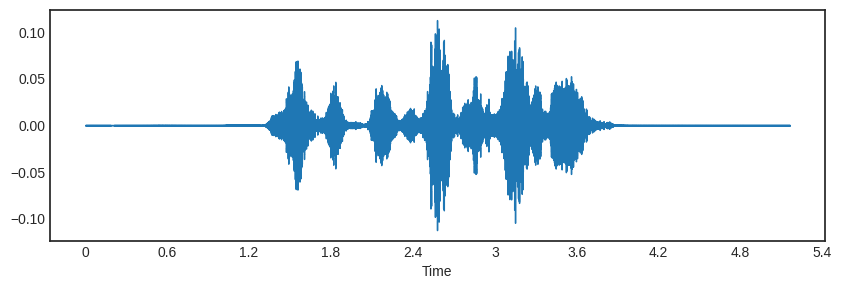

In [ ]:
#afișare waveplot pentru fișierul audio cu viteza de redare micșorată
plt.figure(figsize=(10,3))
x = lower_speed(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

# <center> Extragerea trăsăturilor </center>

<br>După cum înțelegem, datele audio furnizate nu pot fi înțelese direct de modele, așa că trebuie să le convertim într-un format inteligibil. Pentru aceasta se folosește extragerea caracteristicilor.
Semnalul audio este un semnal tridimensional în care cele trei axe reprezintă timpul, amplitudinea și frecvența.


Analizând diagramele de undă de mai sus, pare clar (dintr-un test vizual) că forma de undă în sine nu oferă neapărat informații clare pentru identificarea clasei. De fapt, ele arată destul de asemănătoare.<br/>  
Se pare că unul dintre cele mai bune instrumente pentru extragerea caracteristicilor din formele de undă audio (și din semnalele digitale în general) este coeficienții cepstrali de frecvență Mel (MFCC). Mai jos vom parcurge o discuție tehnică pe scurt, doar pentru a vedea cum funcționează MFCC.

## Referințe
* Toate informațiile despre extragerea caracteristicilor și procesarea audio au fost preluate din: https://medium.com/comet-ml/applyingmachinelearningtoaudioanalysis-utm-source-kdnuggets11-19-e160b069e88
* Coeficienții cepstrali de frecvență Mel (MFCC), introduși de Davis și Mermelstein în 1980.

## Coeficienți cepstrali de frecvență Mel (MFCC)
Această caracteristică este una dintre cele mai importante metode de extragere a caracteristicilor dintr-un semnal audio și este utilizată pe scară largă ori de câte ori se lucrează cu semnale audio. Coeficienții cepstrali de frecvență Mel (MFCC) ai unui semnal reprezintă un set mic de caracteristici (de obicei aproximativ 10-20) care descriu pe scurt forma generală a unui plic spectral.

In [ ]:
#sample_rate = 22050 # reprezintă frecvența de eșantionare

def extract_features(data):

    result = np.array([])

    #mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=42) #42 mfcc so we get frames of ~60 ms
    mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=58)
    mfccs_processed = np.mean(mfccs.T,axis=0)
    result = np.array(mfccs_processed)

    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=3, offset=0.5, res_type='kaiser_fast')

    #without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    #noised
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    #stretched
    stretch_data = stretch(data)
    res3 = extract_features(stretch_data)
    result = np.vstack((result, res3))

    #shifted
    shift_data = shift(data)
    res4 = extract_features(shift_data)
    result = np.vstack((result, res4))

    #pitched
    pitch_data = pitch(data, sample_rate)
    res5 = extract_features(pitch_data)
    result = np.vstack((result, res5))

    #speed up
    higher_speed_data = higher_speed(data)
    res6 = extract_features(higher_speed_data)
    result = np.vstack((result, res6))

    #speed down
    lower_speed_data = higher_speed(data)
    res7 = extract_features(lower_speed_data)
    result = np.vstack((result, res7))

    return result

In [ ]:
if not DATA_FRAMES:

    female_X, female_Y = [], []
    for path, emotion in zip(Females.path, Females.labels):
        features = get_features(path)
        #adding augmentation, get_features return a multi dimensional array (for each augmentation), so we have to use a loop to fill the df
        for elem in features:
            female_X.append(elem)
            female_Y.append(emotion)


    male_X, male_Y = [], []
    for path, emotion in zip(Males.path, Males.labels):
        features = get_features(path)
        for elem in features:
            male_X.append(elem)
            male_Y.append(emotion)

    print(f'Check shapes:\nFemale features: {len(female_X)}, labels: {len(female_Y)}\nMale features:   {len(male_X)}, labels: {len(male_Y)}')

In [ ]:
def setup_dataframe(gender, features, labels):
    df = pd.DataFrame(features)
    df['labels'] = labels
    df.to_csv(f'{gender}_features.csv', index=False)

    print(f'{gender} dataframe')
    df.sample(frac=1).head()

    return df

In [ ]:
if not DATA_FRAMES:
    Females_Features = setup_dataframe('Female', female_X, female_Y)
else:
    Females_Features = pd.read_csv(fem_path)

In [ ]:
if not DATA_FRAMES:
    Males_Features = setup_dataframe('Male', male_X, male_Y)
else:
    Males_Features = pd.read_csv(mal_path)

# <center>Data Preparation
As of now we have extracted the data, now we need to normalize and split our data for training and testing.

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
female_X = Females_Features.iloc[: ,:-1].values
female_Y = Females_Features['labels'].values

male_X = Males_Features.iloc[: ,:-1].values
male_Y = Males_Features['labels'].values

In [ ]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()

female_Y = encoder.fit_transform(np.array(female_Y).reshape(-1,1)).toarray()
male_Y = encoder.fit_transform(np.array(male_Y).reshape(-1,1)).toarray()

## Împărțirea datelor

Pentru a adăuga mai multe dovezi că separarea pe gen are sens.

In [ ]:
nogender_X = np.concatenate((female_X, male_X))
nogender_Y = np.concatenate((female_Y, male_Y))

# "x_train" reprezintă datele de antrenament pe care modelul le va folosi pentru antrenare
# "x_test" reprezintă datele de testare pe care modelul le va folosi pentru a evalua performanța sa după instruire
# "y_train" reprezintă etichetele corespunzătoare datelor de antrenament. "y_test" reprezintă etichetele corespunzătoare datelor de testare
# "test_size=0.2" specifică faptul că 20% (0.20) din date vor fi folosite pentru testare, iar restul de 80% vor fi folosite pentru antrenament
# "random_state=0" este o valoare opțională care ajută la reproducerea rezultatelor. Setând "random_state" la o valoare specifică
# (în acest caz, 0) se asigură că împărțirea datelor este consecventă la rularea codului de mai multe ori.
x_train, x_test, y_train, y_test = train_test_split(nogender_X, nogender_Y, random_state=0, test_size=0.20, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((68107, 58), (68107, 8), (17027, 58), (17027, 8))

In [ ]:
x_trainF, x_testF, y_trainF, y_testF = train_test_split(female_X, female_Y, random_state=0, test_size=0.20, shuffle=True)
x_trainF.shape, y_trainF.shape, x_testF.shape, y_testF.shape

((39379, 58), (39379, 8), (9845, 58), (9845, 8))

In [ ]:
x_trainM, x_testM, y_trainM, y_testM = train_test_split(male_X, male_Y, random_state=0, test_size=0.20, shuffle=True)
x_trainM.shape, y_trainM.shape, x_testM.shape, y_testM.shape

((28728, 58), (28728, 8), (7182, 58), (7182, 8))

* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html  
We are going to scale our features throught the StandarScaler module, it standardize the features in a **Normal curve**, i.e.:<br><br>
  <center> $Z = (X -{\mu})/{\sigma}$. </center><br>
*Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).*

In [ ]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_trainF = scaler.fit_transform(x_trainF)
x_testF = scaler.transform(x_testF)

x_trainM = scaler.fit_transform(x_trainM)
x_testM = scaler.transform(x_testM)

## Making our data compatible to model

In [ ]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape , x_test.shape , y_test.shape

((68107, 58, 1), (68107, 8), (17027, 58, 1), (17027, 8))

In [ ]:
x_trainF = np.expand_dims(x_trainF, axis=2)
x_testF = np.expand_dims(x_testF, axis=2)
x_trainF.shape, y_trainF.shape, x_testF.shape, y_testF.shape

((39379, 58, 1), (39379, 8), (9845, 58, 1), (9845, 8))

In [ ]:
x_trainM = np.expand_dims(x_trainM, axis=2)
x_testM = np.expand_dims(x_testM, axis=2)
x_trainM.shape, y_trainM.shape, x_testM.shape, y_testM.shape

((28728, 58, 1), (28728, 8), (7182, 58, 1), (7182, 8))

# <center>Modeling<center>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, AveragePooling1D
#!pip install np_utils -> a mers
#!pip install to_categorical -> nu gaseste pachetul
#from keras.utils import np_utils, to_categorical -> nu merge asa
from keras.callbacks import ModelCheckpoint

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [ ]:
# Create a MirroredStrategy.
strategy = tf.distribute.MirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

Number of devices: 1


In [ ]:
with strategy.scope():

    def build_model(in_shape):

        model=Sequential()
        model.add(Conv1D(256, kernel_size=6, strides=1, padding='same', activation='relu', input_shape=(in_shape, 1)))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))

        model.add(Conv1D(128, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))

        model.add(Conv1D(128, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))
        model.add(Dropout(0.2))

        model.add(Conv1D(64, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(MaxPooling1D(pool_size=4, strides = 2, padding = 'same'))

        model.add(Flatten())
        model.add(Dense(units=32, activation='relu'))
        model.add(Dropout(0.3))

        model.add(Dense(units=8, activation='softmax'))
        model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])


        return model

In [ ]:
def model_build_summary(mod_dim, tr_features, val_features, val_labels):
    model = build_model(mod_dim)
    model.summary()

    score = model.evaluate(val_features, val_labels, verbose = 1)
    accuracy = 100*score[1]

    return model

*ReduceLROnPlateau* reduce learning rate when a metric has stopped improving.<br>

Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=4, min_lr=0.000001)

batch_size = 32
n_epochs = 75

In [ ]:
def show_graphs(history):
    epochs = [i for i in range(n_epochs)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    test_acc = history.history['val_accuracy']
    test_loss = history.history['val_loss']

    fig.set_size_inches(30,12)
    ax[0].plot(epochs , train_loss , label = 'Training Loss')
    ax[0].plot(epochs , test_loss , label = 'Testing Loss')
    ax[0].set_title('Training & Testing Loss')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")

    ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
    ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
    ax[1].set_title('Training & Testing Accuracy')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    plt.show()

## Model Summary and Pre-training Accuracy

In [ ]:
total_model = model_build_summary(x_train.shape[1], x_train, x_test, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 58, 256)           1792      
                                                                 
 average_pooling1d (Average  (None, 29, 256)           0         
 Pooling1D)                                                      
                                                                 
 conv1d_1 (Conv1D)           (None, 29, 128)           196736    
                                                                 
 average_pooling1d_1 (Avera  (None, 15, 128)           0         
 gePooling1D)                                                    
                                                                 
 conv1d_2 (Conv1D)           (None, 15, 128)           98432     
                                                                 
 average_pooling1d_2 (Avera  (None, 8, 128)            0

In [ ]:
female_model = model_build_summary(x_trainF.shape[1], x_trainF, x_testF, y_testF)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 58, 256)           1792      
                                                                 
 average_pooling1d_3 (Avera  (None, 29, 256)           0         
 gePooling1D)                                                    
                                                                 
 conv1d_5 (Conv1D)           (None, 29, 128)           196736    
                                                                 
 average_pooling1d_4 (Avera  (None, 15, 128)           0         
 gePooling1D)                                                    
                                                                 
 conv1d_6 (Conv1D)           (None, 15, 128)           98432     
                                                                 
 average_pooling1d_5 (Avera  (None, 8, 128)           

In [ ]:
male_model = model_build_summary(x_trainM.shape[1], x_trainM, x_testM, y_testM)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 58, 256)           1792      
                                                                 
 average_pooling1d_6 (Avera  (None, 29, 256)           0         
 gePooling1D)                                                    
                                                                 
 conv1d_9 (Conv1D)           (None, 29, 128)           196736    
                                                                 
 average_pooling1d_7 (Avera  (None, 15, 128)           0         
 gePooling1D)                                                    
                                                                 
 conv1d_10 (Conv1D)          (None, 15, 128)           98432     
                                                                 
 average_pooling1d_8 (Avera  (None, 8, 128)           

## Model training

In [ ]:
history = total_model.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/75
2129/2129 [==============================] - 121s 56ms/step - loss: 1.4091 - accuracy: 0.4376 - val_loss: 1.1649 - val_accuracy: 0.5342 - lr: 0.0010
Epoch 2/75
2129/2129 [==============================] - 122s 57ms/step - loss: 1.1793 - accuracy: 0.5293 - val_loss: 1.0809 - val_accuracy: 0.5682 - lr: 0.0010
Epoch 3/75
2129/2129 [==============================] - 114s 53ms/step - loss: 1.1027 - accuracy: 0.5649 - val_loss: 1.0229 - val_accuracy: 0.5906 - lr: 0.0010
Epoch 4/75
2129/2129 [==============================] - 116s 55ms/step - loss: 1.0446 - accuracy: 0.5879 - val_loss: 0.9671 - val_accuracy: 0.6117 - lr: 0.0010
Epoch 5/75
2129/2129 [==============================] - 117s 55ms/step - loss: 0.9959 - accuracy: 0.6089 - val_loss: 0.9243 - val_accuracy: 0.6332 - lr: 0.0010
Epoch 6/75
2129/2129 [==============================] - 113s 53ms/step - loss: 0.9514 - accuracy: 0.6276 - val_loss: 0.9069 - val_accuracy: 0.6397 - lr: 0.0010
Epoch 7/75
2129/2129 [==================

In [ ]:
female_history = female_model.fit(x_trainF, y_trainF, batch_size=batch_size, epochs=n_epochs, validation_data=(x_testF, y_testF), callbacks=[rlrp])

Epoch 1/75
1231/1231 [==============================] - 67s 53ms/step - loss: 1.2406 - accuracy: 0.5052 - val_loss: 0.9369 - val_accuracy: 0.6257 - lr: 0.0010
Epoch 2/75
1231/1231 [==============================] - 66s 54ms/step - loss: 0.9706 - accuracy: 0.6094 - val_loss: 0.8358 - val_accuracy: 0.6631 - lr: 0.0010
Epoch 3/75
1231/1231 [==============================] - 66s 54ms/step - loss: 0.8860 - accuracy: 0.6409 - val_loss: 0.8171 - val_accuracy: 0.6684 - lr: 0.0010
Epoch 4/75
1231/1231 [==============================] - 68s 55ms/step - loss: 0.8289 - accuracy: 0.6672 - val_loss: 0.7512 - val_accuracy: 0.6999 - lr: 0.0010
Epoch 5/75
1231/1231 [==============================] - 67s 55ms/step - loss: 0.7822 - accuracy: 0.6855 - val_loss: 0.7065 - val_accuracy: 0.7120 - lr: 0.0010
Epoch 6/75
1231/1231 [==============================] - 66s 54ms/step - loss: 0.7373 - accuracy: 0.7075 - val_loss: 0.6627 - val_accuracy: 0.7381 - lr: 0.0010
Epoch 7/75
1231/1231 [========================

In [ ]:
male_history = male_model.fit(x_trainM, y_trainM, batch_size=batch_size, epochs=n_epochs, validation_data=(x_testM, y_testM), callbacks=[rlrp])

Epoch 1/75
898/898 [==============================] - 50s 52ms/step - loss: 1.6879 - accuracy: 0.3158 - val_loss: 1.4807 - val_accuracy: 0.4025 - lr: 0.0010
Epoch 2/75
898/898 [==============================] - 48s 53ms/step - loss: 1.5125 - accuracy: 0.3901 - val_loss: 1.3948 - val_accuracy: 0.4421 - lr: 0.0010
Epoch 3/75
898/898 [==============================] - 49s 55ms/step - loss: 1.4277 - accuracy: 0.4289 - val_loss: 1.3229 - val_accuracy: 0.4761 - lr: 0.0010
Epoch 4/75
898/898 [==============================] - 47s 52ms/step - loss: 1.3665 - accuracy: 0.4586 - val_loss: 1.2648 - val_accuracy: 0.5022 - lr: 0.0010
Epoch 5/75
898/898 [==============================] - 48s 53ms/step - loss: 1.3017 - accuracy: 0.4871 - val_loss: 1.1838 - val_accuracy: 0.5391 - lr: 0.0010
Epoch 6/75
898/898 [==============================] - 48s 53ms/step - loss: 1.2469 - accuracy: 0.5096 - val_loss: 1.1532 - val_accuracy: 0.5533 - lr: 0.0010
Epoch 7/75
898/898 [==============================] - 47s 

**Uncomment the code below to see the output of a specific layer

In [ ]:
'''
from keras import backend as K

layer_name = 'conv1d_11'
intermediate_layer_model = keras.Model(inputs=female_model.input,
                                       outputs=female_model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model(x_testF)
print(intermediate_output[1,0])
'''

## Performance Evaluations

In [ ]:
# genderless
score = total_model.evaluate(x_train,y_train, verbose = 0)
print("Mixed-gender emotions training Accuracy: {0:.2%}".format(score[1]))

score = total_model.evaluate(x_test, y_test, verbose=0)
print("Mixed-gender emotions testing Accuracy: {0:.2%}".format(score[1]))

Mixed-gender emotions training Accuracy: 96.94%
Mixed-gender emotions testing Accuracy: 87.86%


In [ ]:
score = female_model.evaluate(x_trainF,y_trainF, verbose = 0)
print("Female emotions training Accuracy: {0:.2%}".format(score[1]))

score = female_model.evaluate(x_testF, y_testF, verbose=0)
print("Female emotions testing Accuracy: {0:.2%}".format(score[1]))

Female emotions training Accuracy: 99.16%
Female emotions testing Accuracy: 92.98%


In [ ]:
score = male_model.evaluate(x_trainM,y_trainM, verbose = 0)
print("Male emotions training Accuracy: {0:.2%}".format(score[1]))

score = male_model.evaluate(x_testM, y_testM, verbose=0)
print("Male emotions testing Accuracy: {0:.2%}".format(score[1]))

Male emotions training Accuracy: 98.60%
Male emotions testing Accuracy: 87.76%


## Training and Validation trends

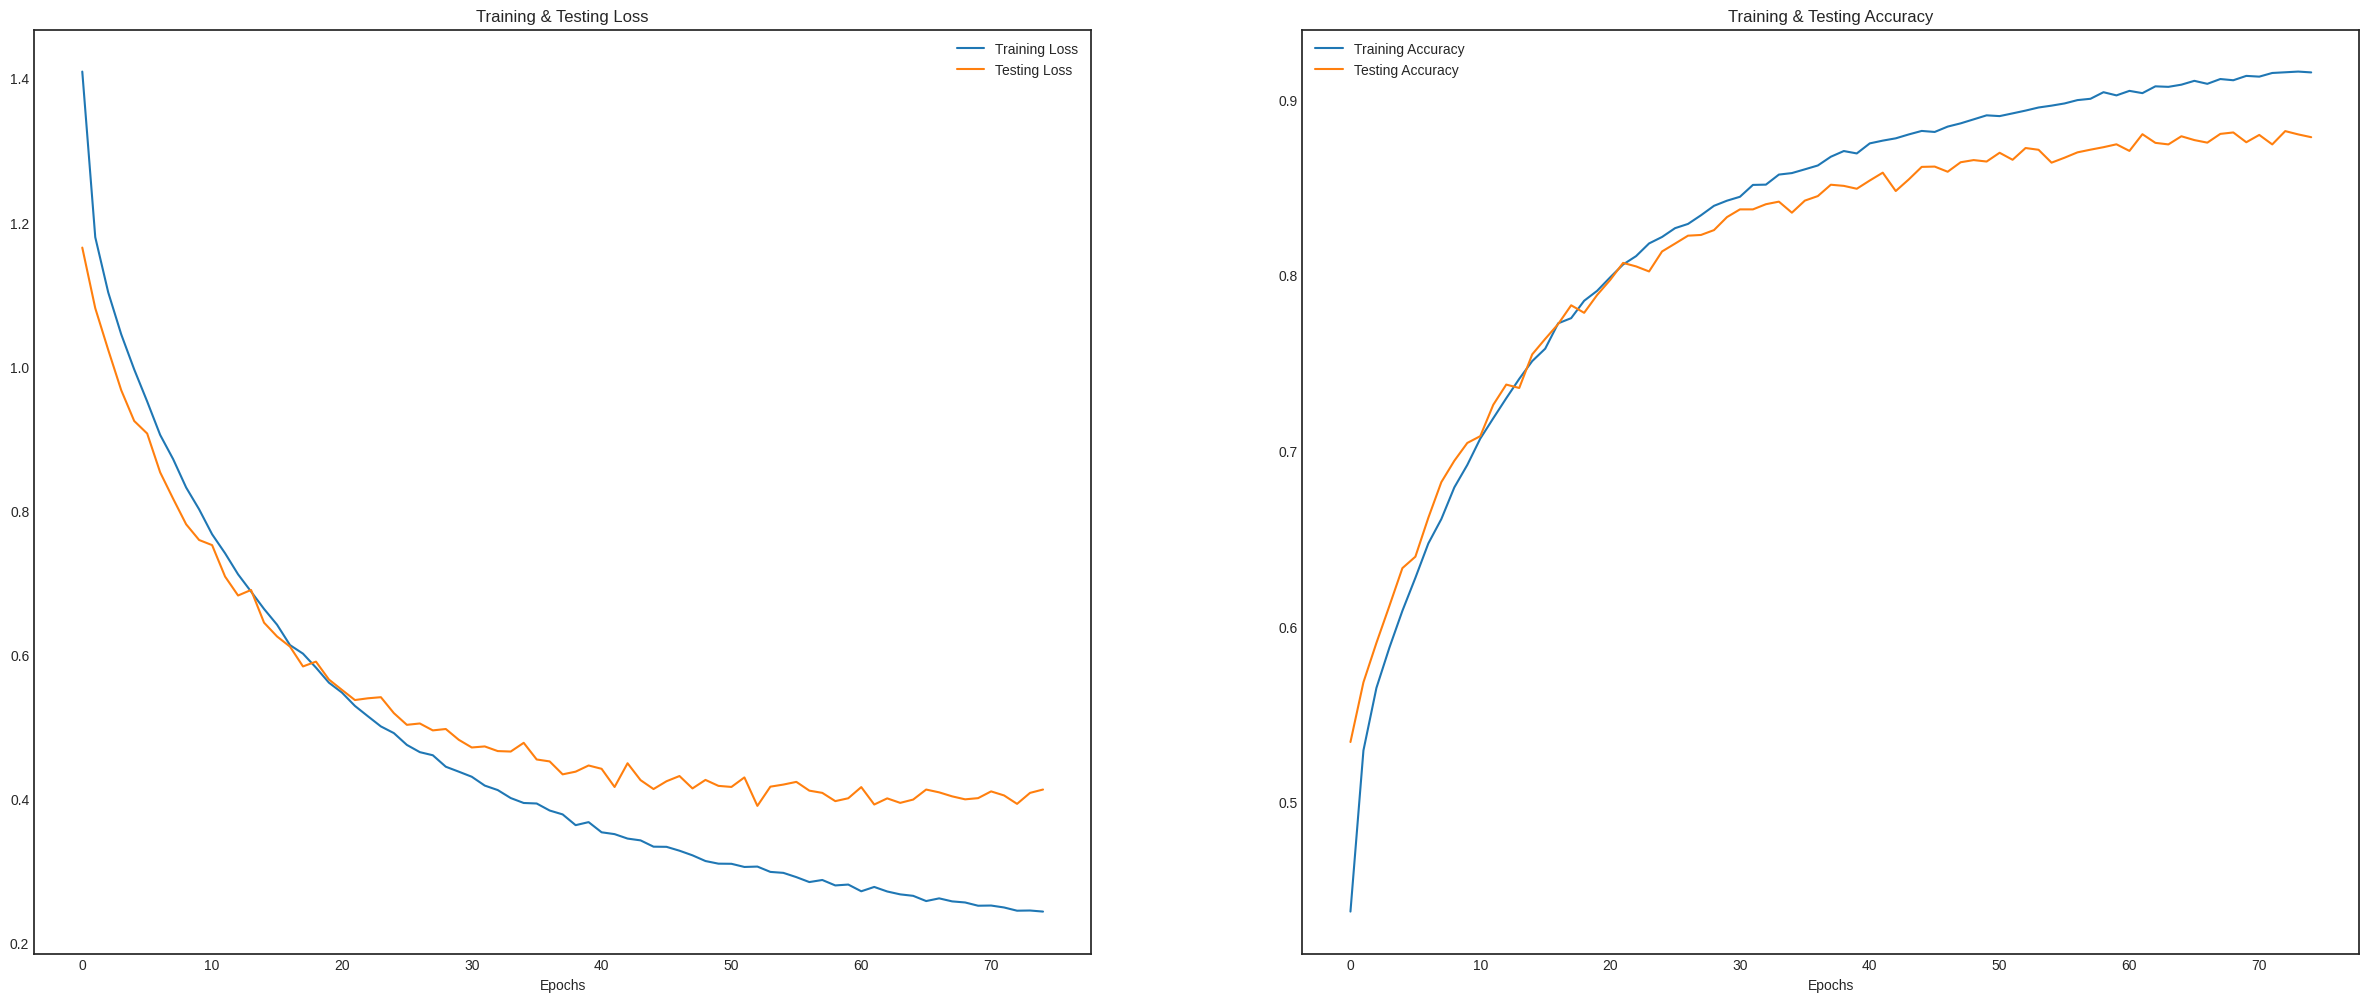

In [ ]:
show_graphs(history)

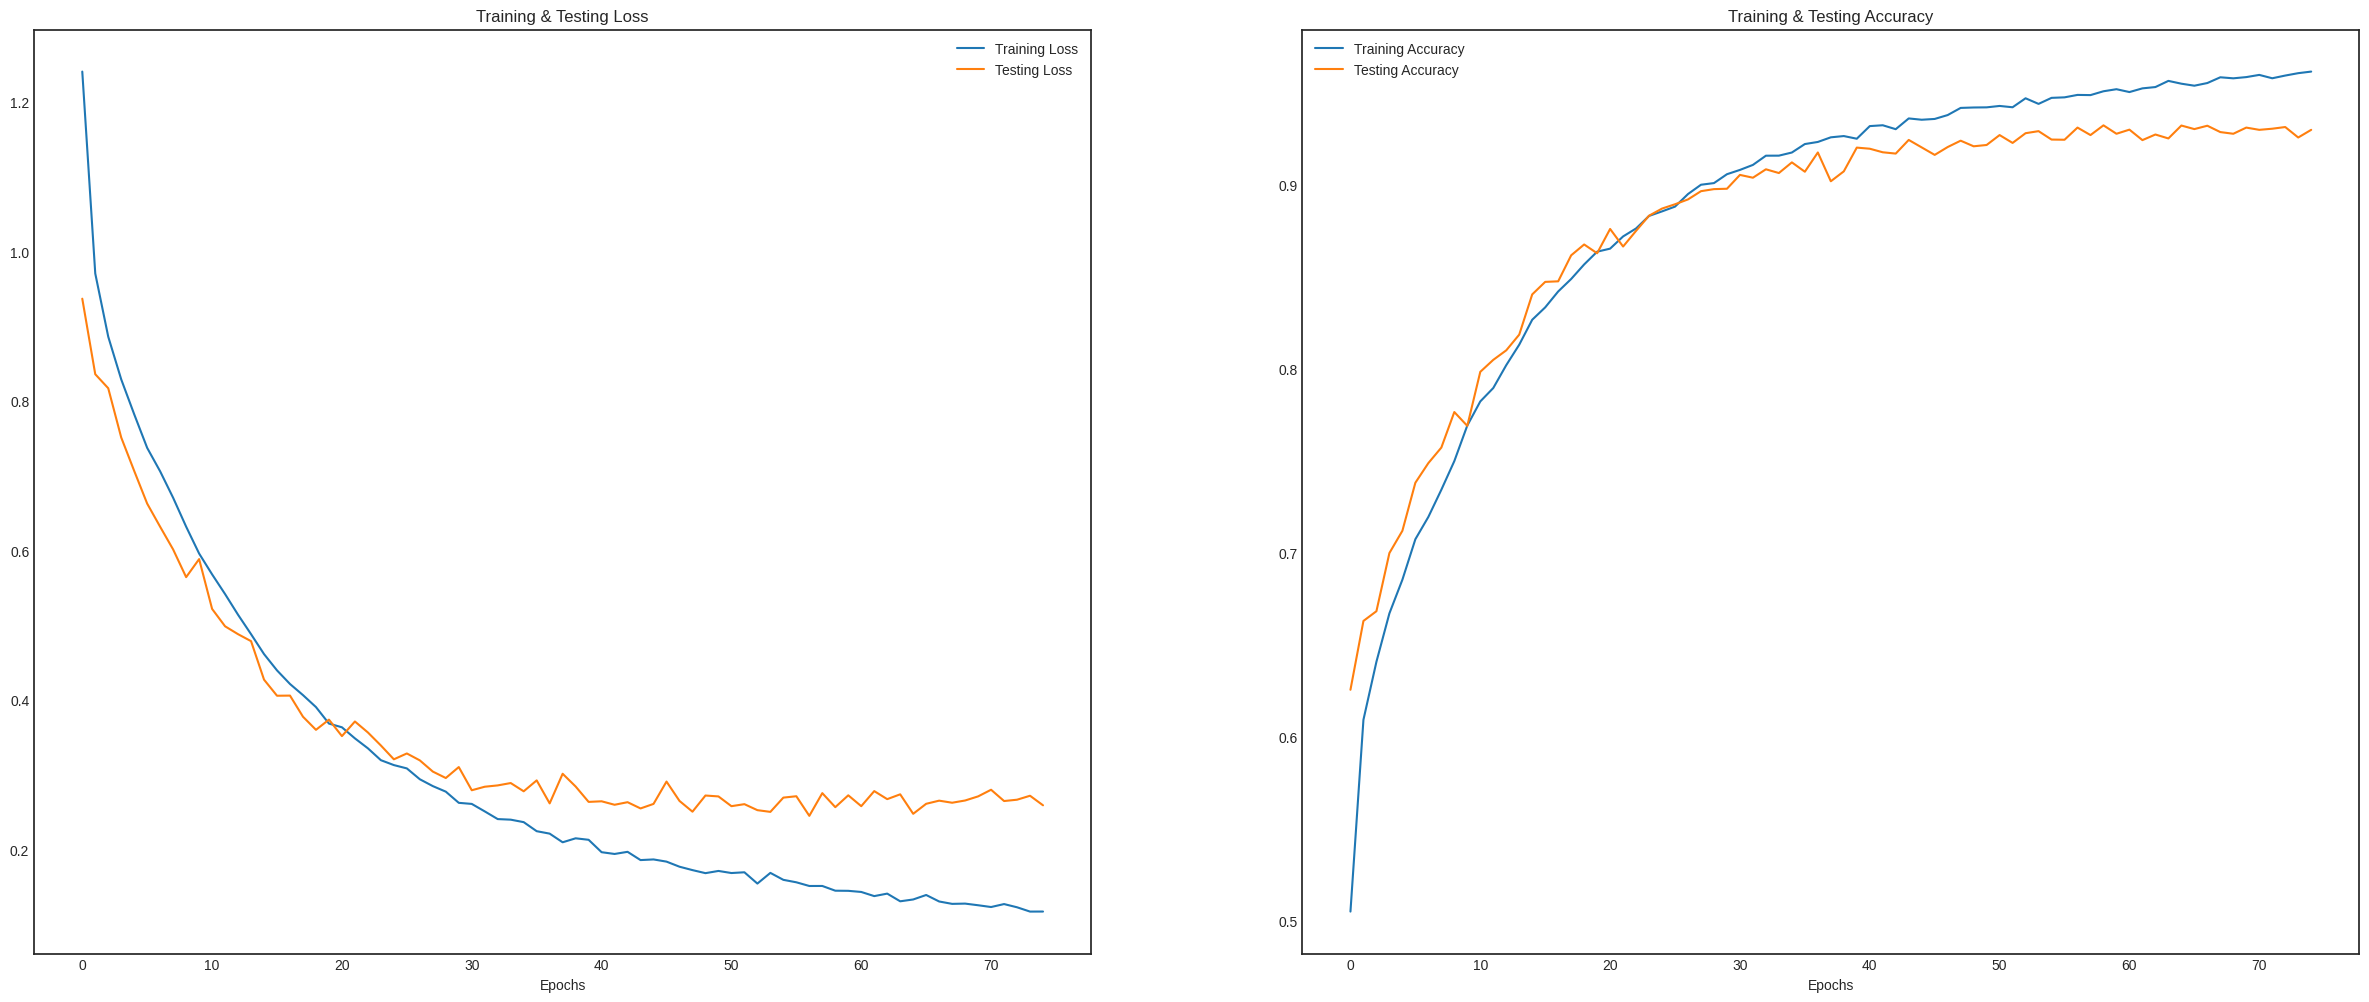

In [ ]:
show_graphs(female_history)

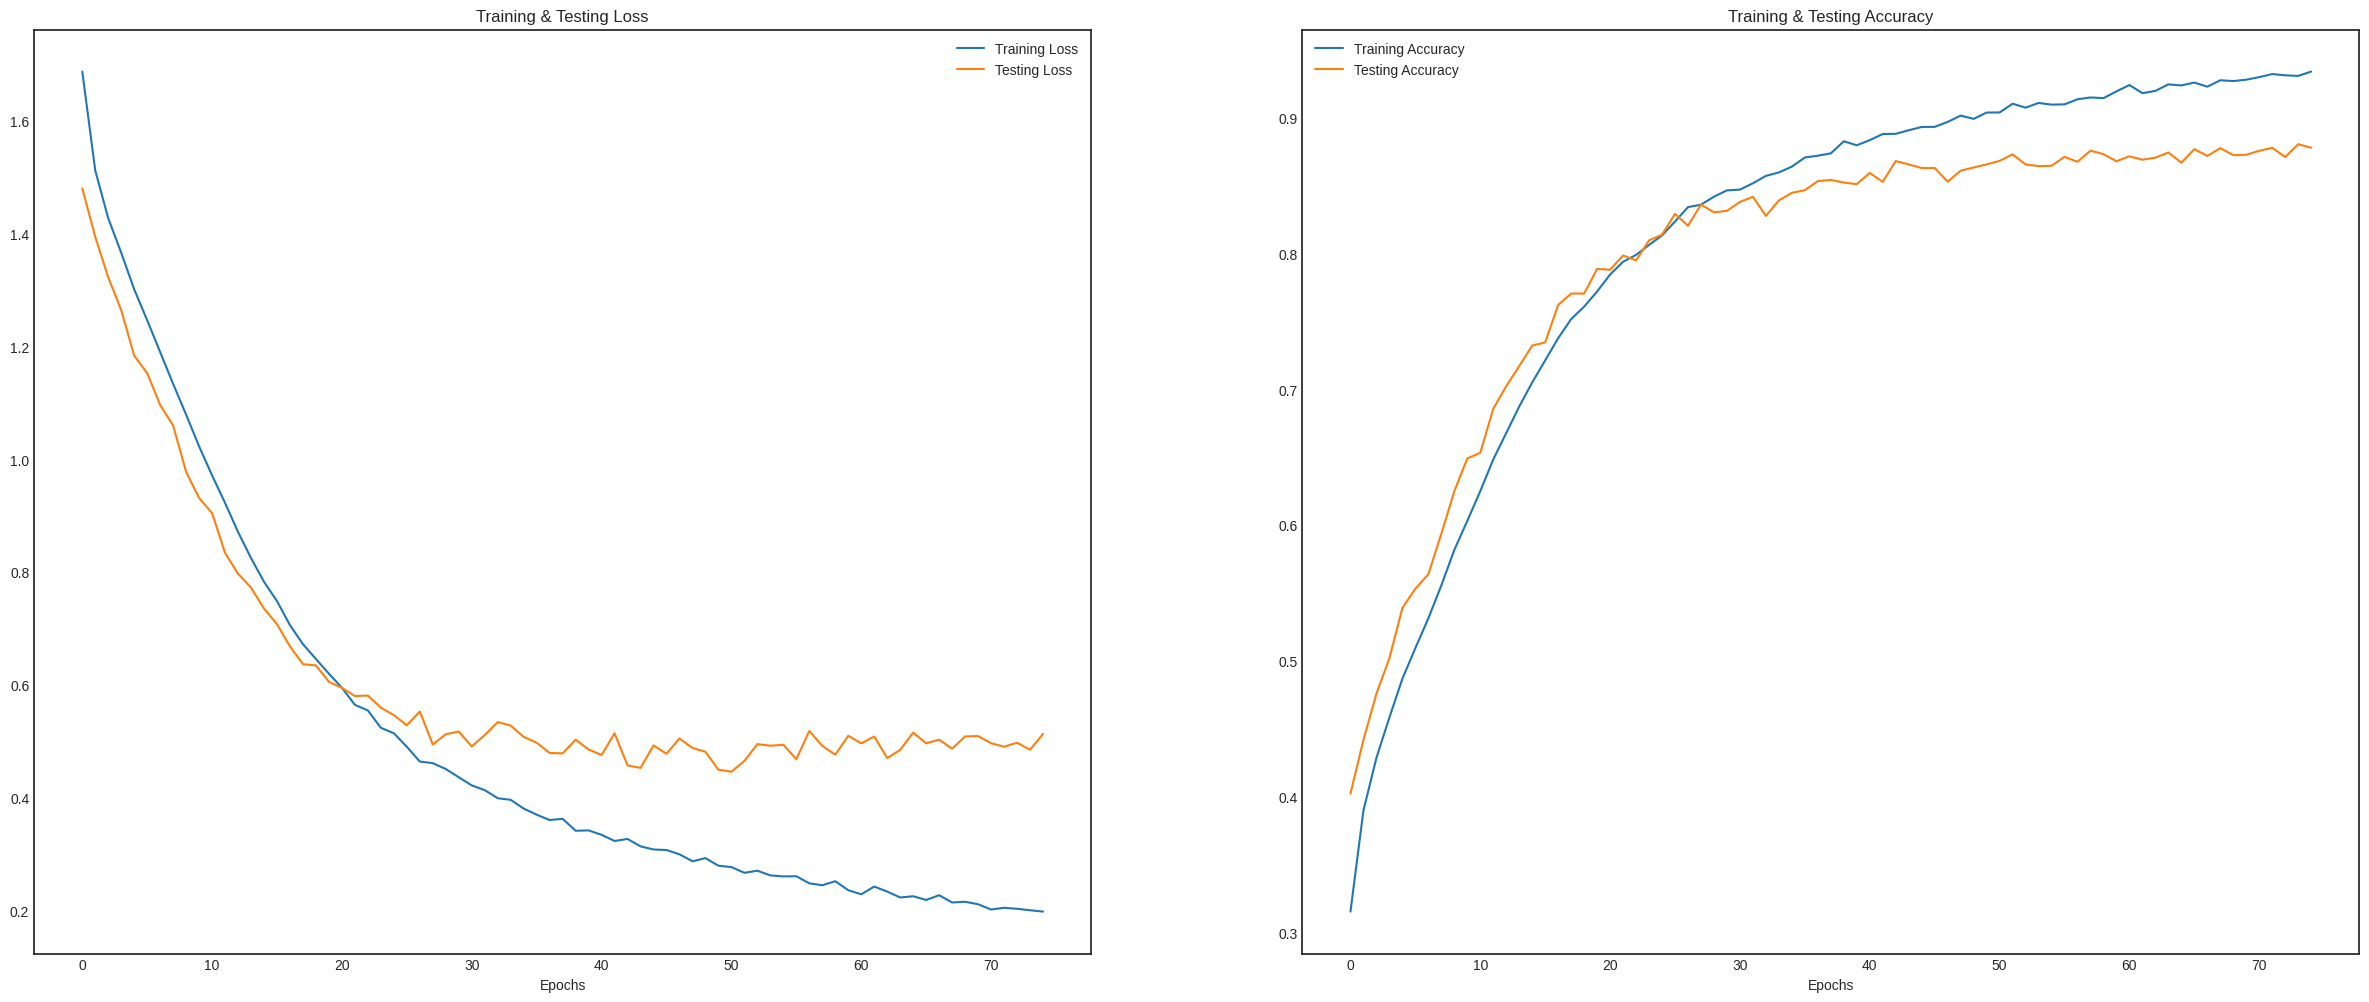

In [ ]:
show_graphs(male_history)

## Confusion matrix

In [ ]:
# predicting on test data.
pred_test = female_model.predict(x_testF)
y_pred = encoder.inverse_transform(pred_test)
y_test_ = encoder.inverse_transform(y_testF)

308/308 [==============================] - 4s 12ms/step


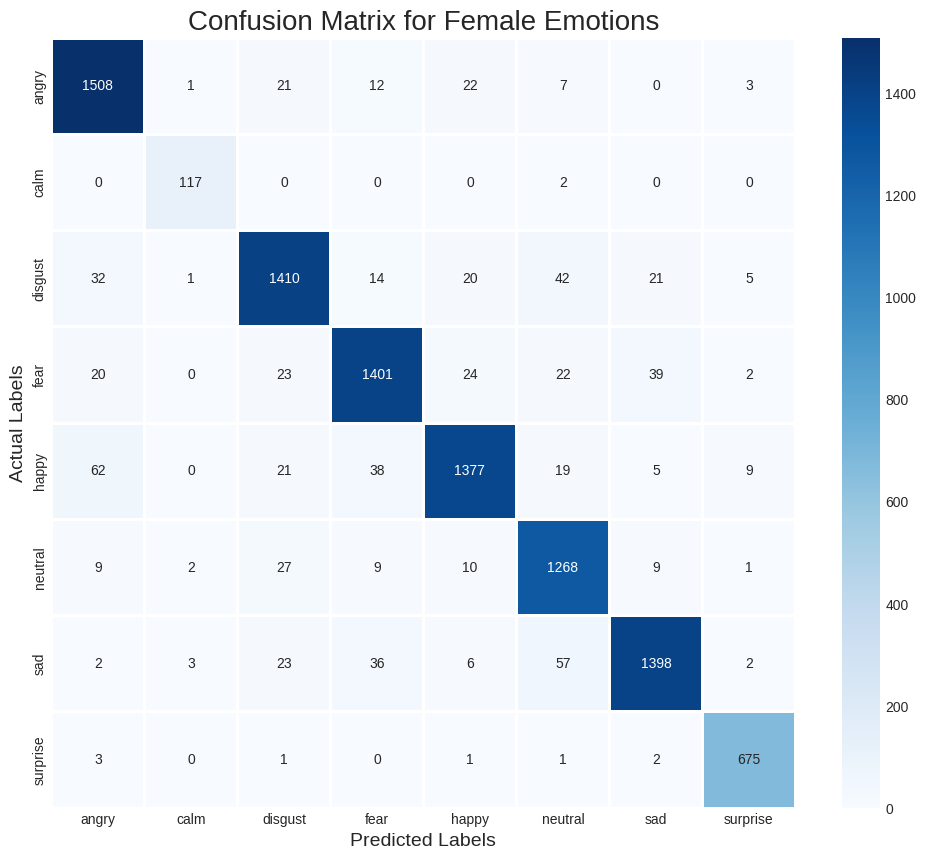

In [ ]:
cm = confusion_matrix(y_test_, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for Female Emotions', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
# predicting on test data.
pred_test = male_model.predict(x_testM)
y_pred = encoder.inverse_transform(pred_test)
y_test_ = encoder.inverse_transform(y_testM)

225/225 [==============================] - 4s 19ms/step


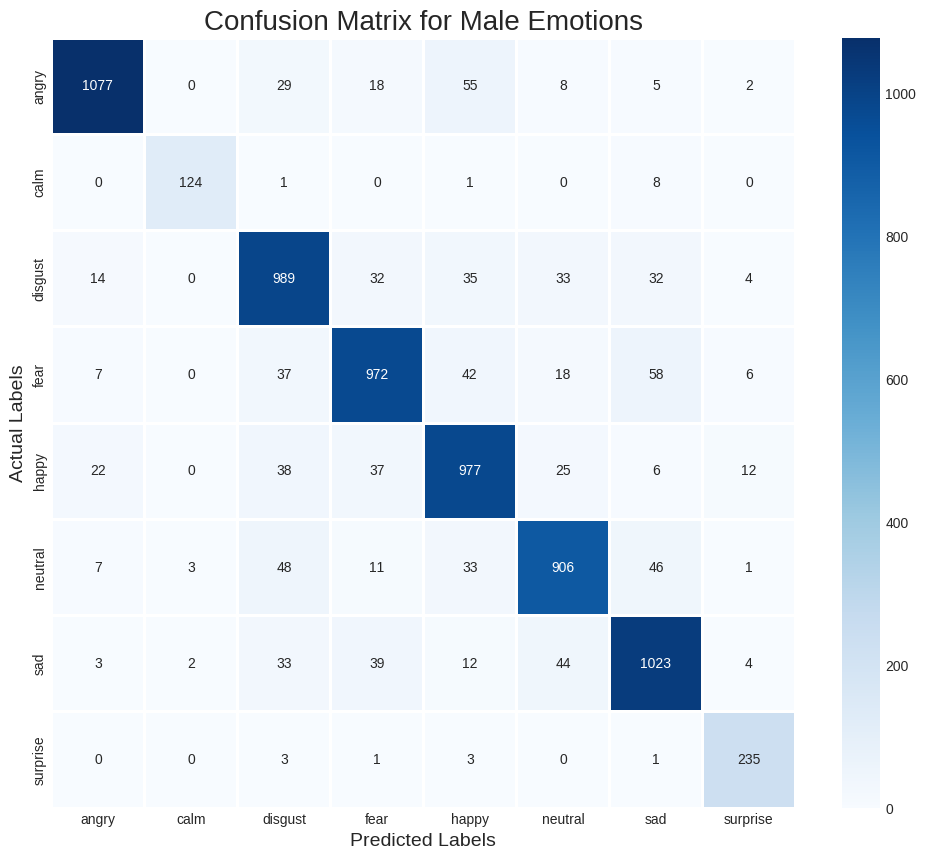

In [ ]:
cm = confusion_matrix(y_test_, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for Male Emotions', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()